In [1]:
from galerkin import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

/home/kristian/Code/MAT-MEK9270-mandatory2/galerkin.py:283: SyntaxWarning: invalid escape sequence '\p'
  """Base class for function spaces created as linear combinations of orthogonal basis functions


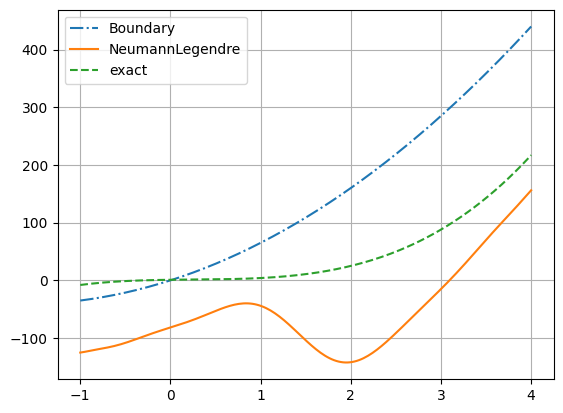

test_helmholtz: L2 error = 2.3354e+02, N = 12, NeumannLegendre


In [2]:
ue = 4*x**3 - 3*x**2 + 2*x + 1
f = ue
domain = (-1, 4)
constraint = sp.integrate(ue, (x, domain[0], domain[1]))
space = NeumannLegendre
if space in (NeumannChebyshev, NeumannLegendre, Cosines):
    bc = ue.diff(x, 1).subs(x, domain[0]), ue.diff(
        x, 1).subs(x, domain[1])
else:
    bc = ue.subs(x, domain[0]), ue.subs(x, domain[1])
N = 60 if space in (Sines, Cosines) else 12
V = space(N, domain=domain, bc=bc, constraint=constraint)
u = TrialFunction(V)
v = TestFunction(V)
A = inner(u, v)
b = inner(f-(V.B.x), v)
u_tilde = np.linalg.solve(A.toarray(), b)
xs = np.linspace(domain[0], domain[1], 200)
u_tilde_xs = V.eval(u_tilde, xs)
u_xs = sp.lambdify(x, ue)(xs)
B_xs = sp.lambdify(x, V.B.x)(xs)
plt.plot(xs, B_xs, '-.', label='Boundary')
plt.plot(xs, u_tilde_xs, label=f'{V.__class__.__name__}')
plt.plot(xs, u_xs, '--', label=f'exact')
plt.legend()
plt.grid()
plt.show()
err = L2_error(u_tilde, ue, V)
print(
    f'test_helmholtz: L2 error = {err:2.4e}, N = {N}, {V.__class__.__name__}')

In [3]:
j = 2
f = sp.cos(j*sp.pi*x)
sp.integrate(f**2, (x, 0, 1))

1/2

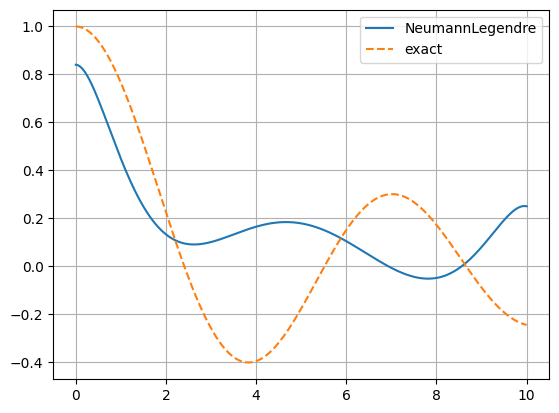

test_helmholtz: L2 error = 9.9307e-01, N = 12, NeumannLegendre


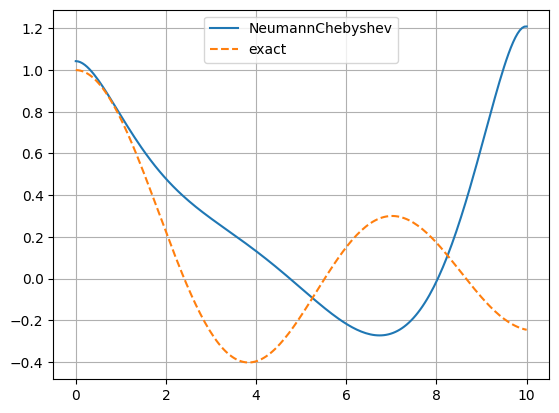

test_helmholtz: L2 error = 1.6459e+00, N = 12, NeumannChebyshev


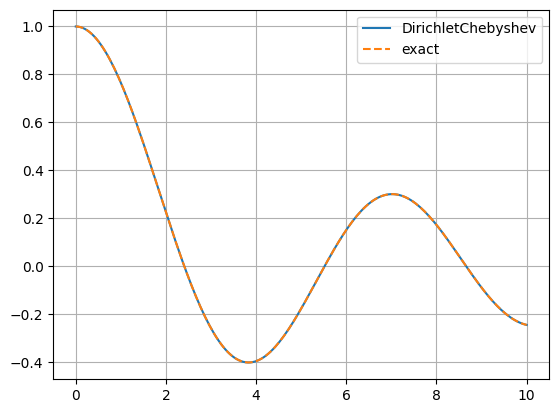

test_helmholtz: L2 error = 7.7719e-07, N = 12, DirichletChebyshev


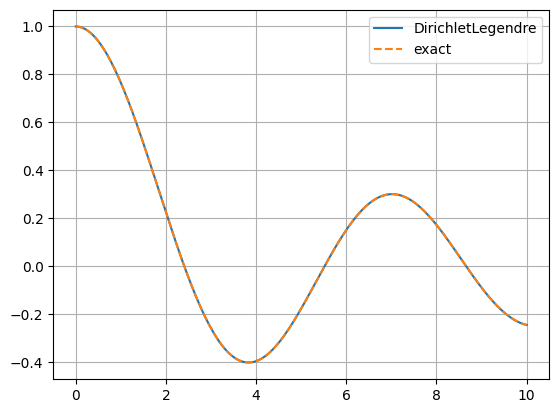

test_helmholtz: L2 error = 5.6773e-07, N = 12, DirichletLegendre


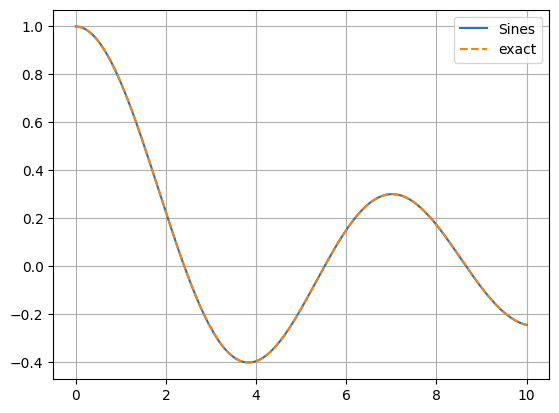

test_helmholtz: L2 error = 1.2783e-04, N = 60, Sines


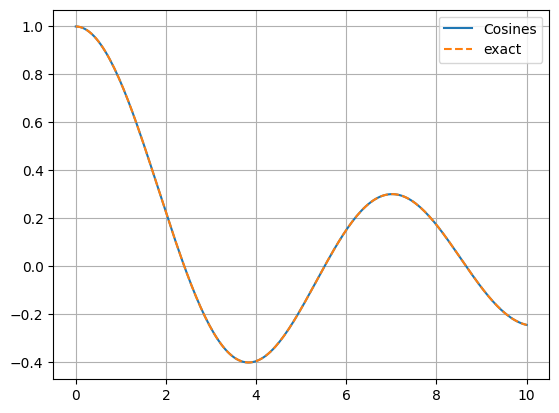

test_helmholtz: L2 error = 1.5038e-07, N = 60, Cosines


In [4]:
ue = sp.besselj(0, x)
f = ue.diff(x, 2)+ue
domain = (0, 10)
for space in (NeumannLegendre, NeumannChebyshev, DirichletChebyshev, DirichletLegendre, Sines, Cosines):
    if space in (NeumannChebyshev, NeumannLegendre, Cosines):
        bc = ue.diff(x, 1).subs(x, domain[0]), ue.diff(
            x, 1).subs(x, domain[1])
    else:
        bc = ue.subs(x, domain[0]), ue.subs(x, domain[1])
    N = 60 if space in (Sines, Cosines) else 12
    V = space(N, domain=domain, bc=bc)
    u = TrialFunction(V)
    v = TestFunction(V)
    A = inner(u.diff(2), v) + inner(u, v)
    b = inner(f-(V.B.x.diff(x, 2)+V.B.x), v)
    u_tilde = np.linalg.solve(A, b)
    xs = np.linspace(domain[0], domain[1], 200)
    u_tilde_xs = V.eval(u_tilde, xs)
    u_xs = sp.lambdify(x, ue)(xs)
    plt.plot(xs, u_tilde_xs, label=f'{V.__class__.__name__}')
    plt.plot(xs, u_xs, '--', label=f'exact')
    plt.legend()
    plt.grid()
    plt.show()
    err = L2_error(u_tilde, ue, V)
    print(f'test_helmholtz: L2 error = {err:2.4e}, N = {N}, {V.__class__.__name__}')